In [1]:
import pandas as pd
palindrome_df = pd.read_excel(r"C:\Users\tmakhaza\Desktop\Palindrome_Interview_task.xlsx")
print(palindrome_df)

                     District Code     Estimate  Prevalence_%  Prevalence_LCL  \
0                Buffalo City  BUF       Survey     13.600000       10.268000   
1                Buffalo City  BUF  Fay-Heriott     13.501283       11.031605   
2           City of Cape Town  CPT       Survey      5.200000        3.044000   
3           City of Cape Town  CPT  Fay-Heriott      6.020043        4.335072   
4                  West Coast  DC1       Survey      2.700000        0.000000   
..                        ...  ...          ...           ...             ...   
99                   Mangaung  MAN  Fay-Heriott      9.147425        6.725917   
100  Nelson Mandela Bay Metro  NMA       Survey      8.300000        3.400000   
101  Nelson Mandela Bay Metro  NMA  Fay-Heriott      9.054060        6.128703   
102           City of Tshwane  TSH       Survey     11.700000        7.388000   
103           City of Tshwane  TSH  Fay-Heriott     11.024858        8.255934   

     Prevalence_UCL  NoPLHI

In [2]:
# (2a) Calculating the total for Number of PLHIV for all districts
Survey_estimates = palindrome_df.query ('Estimate == "Survey"')
Survey_estimates["NoPLHIV"].sum()

6409903

In [3]:
# (2b). Calculating the mean number of PLHIV for the two estimates in Xhariep district
# district = ['Xhariep', '']
Xhariepdata = palindrome_df.query('District == "Xhariep"')
Xhariepdata["NoPLHIV"].mean()

12247.5

In [5]:
# (2c) Create a new variable 'Total_Population'
palindrome_df['Total_Population'] = palindrome_df['NoPLHIV'] / (palindrome_df['Prevalence_%']/100)
print(palindrome_df)

# Adding a new column 'Not_Living_With_HIV' and calculating the number of people not living with HIV for each row
palindrome_df['Not_Living_With_HIV'] = palindrome_df['Total_Population'] - palindrome_df['NoPLHIV']

                     District Code     Estimate  Prevalence_%  Prevalence_LCL  \
0                Buffalo City  BUF       Survey     13.600000       10.268000   
1                Buffalo City  BUF  Fay-Heriott     13.501283       11.031605   
2           City of Cape Town  CPT       Survey      5.200000        3.044000   
3           City of Cape Town  CPT  Fay-Heriott      6.020043        4.335072   
4                  West Coast  DC1       Survey      2.700000        0.000000   
..                        ...  ...          ...           ...             ...   
99                   Mangaung  MAN  Fay-Heriott      9.147425        6.725917   
100  Nelson Mandela Bay Metro  NMA       Survey      8.300000        3.400000   
101  Nelson Mandela Bay Metro  NMA  Fay-Heriott      9.054060        6.128703   
102           City of Tshwane  TSH       Survey     11.700000        7.388000   
103           City of Tshwane  TSH  Fay-Heriott     11.024858        8.255934   

     Prevalence_UCL  NoPLHI

In [6]:
# 2(d) Filtering rows where the district name contains 'city' or 'metro'
city_df = palindrome_df[palindrome_df['District'].str.contains('City', case=False) | palindrome_df['District'].str.contains('Metro', case=False)]

# Calculating the total number of people living with HIV in cities
total_no_plhiv_cities = city_df['NoPLHIV'].sum()

# Displaying the total number of PLHIV in cities
print(f'Total NoPLHIV in Cities: {total_no_plhiv_cities}')

Total NoPLHIV in Cities: 2572733


In [7]:
# (3) Removing special/non-alphabetic characters from column names
palindrome_df.columns = palindrome_df.columns.str.replace('[^a-zA-Z0-9]+', '')

# Displaying the resultant field names output
print(palindrome_df.columns)

Index(['District', 'Code', 'Estimate', 'Prevalence', 'PrevalenceLCL',
       'PrevalenceUCL', 'NoPLHIV', 'NoPLHIVLCL', 'NoPLHIVUCL',
       'TotalPopulation', 'NotLivingWithHIV'],
      dtype='object')


C:\Users\tmakhaza\AppData\Local\Temp/ipykernel_15784/793926607.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  palindrome_df.columns = palindrome_df.columns.str.replace('[^a-zA-Z0-9]+', '')


In [9]:
# (Q4) Plotting Prevalence confidence interval for districts that end in 'i', according to Fay-Herriott estimates
import matplotlib.pyplot as plt

# Filtering rows where the estimate name contains 'Fay-Heriott'
fay_df = palindrome_df[palindrome_df['Estimate'].str.startswith('F')]

# Filtering rows where the district name ends in 'i' and the estimate name contains 'Fay-Heriott'
filtered_df = fay_df[fay_df['District'].str.endswith('i')]

# Printing rows where the district name ends in 'i' and the estimate name contains 'Fay-Heriott'
print(filtered_df)


                     District  Code     Estimate  Prevalence  PrevalenceLCL  \
11                 Chris Hani  DC13  Fay-Heriott   14.080983      11.181220   
13                  Joe Gqabi  DC14  Fay-Heriott   11.507804       9.291766   
25                Fezile Dabi  DC20  Fay-Heriott   10.030754       7.811309   
33                 uMzinyathi  DC24  Fay-Heriott   18.097578      16.845087   
51                  Ehlanzeni  DC32  Fay-Heriott   15.820960      12.012425   
53                     Mopani  DC33  Fay-Heriott   11.294971       7.921185   
65  Dr Ruth Segomotsi Mompati  DC39  Fay-Heriott   11.045235       8.164344   
93                 Ekurhuleni   EKU  Fay-Heriott   13.678908      10.647292   
95                  eThekwini   ETH  Fay-Heriott   14.537772      11.791222   

    PrevalenceUCL  NoPLHIV  NoPLHIVLCL  NoPLHIVUCL  TotalPopulation  \
11      17.583893   113090       89801      141224     8.031400e+05   
13      14.169794    40618       32796       50013     3.529605e+05

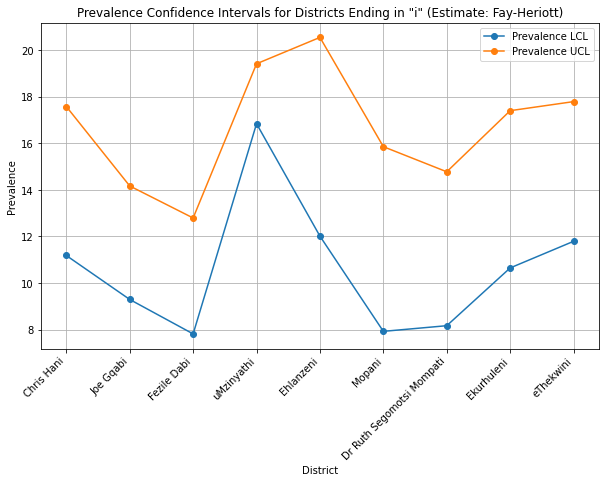

In [10]:
# (Q4) Plotting the Prevalence_UCL and Prevalence_LCL using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['District'], filtered_df['PrevalenceLCL'], label='Prevalence LCL', marker='o')
plt.plot(filtered_df['District'], filtered_df['PrevalenceUCL'], label='Prevalence UCL', marker='o')
plt.xlabel('District')
plt.ylabel('Prevalence')
plt.title('Prevalence Confidence Intervals for Districts Ending in "i" (Estimate: Fay-Heriott)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()